# Simple Linear Regression

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [142]:
url='https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day48-simple-linear-regression/placement.csv'
df = pd.read_csv(url)
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

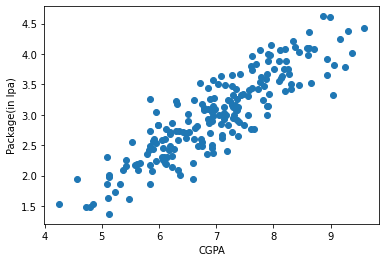

In [91]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [143]:
X = df.drop(columns='package',axis=1)
y = df['package']

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [98]:
y_pred=lr.predict(X_test)

In [99]:
print(lr.predict(X_test.iloc[0].values.reshape(1,1))) #bc algo expects 2d array and we are providing 1d
print(lr.predict(X_test.iloc[[0]]))  # this is shorter alternative way

[3.89111601]
[3.89111601]


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Not working
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

<AxesSubplot:xlabel='cgpa', ylabel='package'>

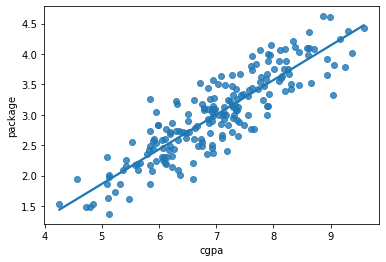

In [82]:
#  importing libraries
import seaborn as sb

# use regplot
sb.regplot(x =X,
            y = y, 
            ci = None,
            data = df)

In [86]:
# basically a weight that shows how much x is dependent on y
m=lr.coef_

In [87]:
# b is there the give a starting point if m is 0 there has to be some value remaining to tell even if at x=0 there is no y=0 output
# like 'experience vs lpa' if experience is 0 there is still some amount of package to be received in the y output
b=lr.intercept_

In [88]:
# y = mx + b
# I entered the first value of X column
m*8.58 + b

array([3.89111601])

In [101]:
# if a student have cgpa of 9.5
m * 9.5 + b

array([4.40443183])

# Linear Regression from scratch

In [123]:
class MeraLR:
    
    def __init__(self):
        self.m= None
        self.b=None
        
    def fit(self,X_train,y_train):
        num=0
        den=0
        
        for i in range(X_train.shape[0]):
            num = num + (X_train[i] - X_train.mean())*(y_train[i] - y_train.mean())
            den = den + (X_train[i] - X_train.mean())**2
            
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
            
    
    def predict(self,X_test):
        print(X_test)
        return self.m * X_test + self.b

In [124]:
import numpy as np
import pandas as pd

In [125]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [138]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [128]:
X_train.shape

(160,)

In [129]:
lr = MeraLR()

In [130]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [131]:
X_test[0]

8.58

In [132]:
lr.predict(X_test[0])

8.58


3.891116009744203

# Regression Metrics

In [146]:
df = pd.read_csv(url)
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [134]:
lr.predict(X_test)

[8.58 7.15 5.88 6.22 4.57 4.79 5.32 6.86 8.35 6.87 8.94 7.9  6.93 5.91
 7.32 7.82 5.09 7.42 6.94 7.73 6.19 7.28 6.73 7.2  8.21 6.75 7.87 7.6
 8.63 5.12 8.15 7.36 8.31 6.6  6.59 7.47 7.93 6.29 6.37 6.47]


array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [145]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [148]:
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [149]:
print('MSE:', mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [151]:
print('RMAE:', np.sqrt(mean_squared_error(y_test,y_pred)))

RMAE 0.34827051717731616


In [153]:
print('r2 score: ', r2_score(y_test,y_pred))

r2 score:  0.780730147510384


In [154]:
X_test.shape

(40, 1)

In [155]:
r2=r2_score(y_test,y_pred)

In [165]:
#Adjusted r2 score

num=(1-r2)*(X_test.shape[0]-1)
den=(X_test.shape[0]-1-X_test.shape[1])

1-num/den

0.7749598882343415

#### New data with irrlevent column

In [179]:
new_df1=df.copy()
new_df1['irrlevent col']=np.random.random(200)

new_df1=new_df1[['cgpa','irrlevent col','package']]
new_df1.head()

,cgpa,irrlevent col,package
0,6.89,0.592476,3.26
1,5.12,0.692588,1.98
2,7.82,0.725526,3.25
3,7.42,0.528816,3.67
4,6.94,0.035430,3.57


Text(0, 0.5, 'Package(in lpa)')

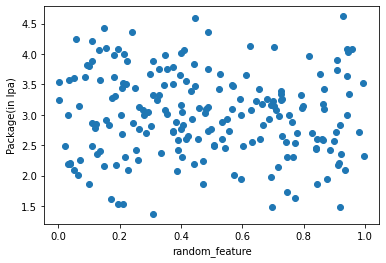

In [180]:
plt.scatter(new_df1['irrlevent col'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [181]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [182]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [183]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [184]:
y_pred = lr.predict(X_test)

In [186]:
# change in new data with useless col gives r2 score with different results
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7709608248944424


In [187]:
#Adjusted r2 score
# It helps when you have more columns (curse of dimensionality)
# you can see it has reduce shows that the data has irr col

num=(1-r2)*(X_test.shape[0]-1)
den=(X_test.shape[0]-1-X_test.shape[1])

1-num/den

0.7585803289427906

### New data with relevent column

In [188]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [189]:
new_df2.sample(5)

,cgpa,iq,package
51,9.26,2.69,3.79
171,8.01,4.36,3.76
113,6.94,1.17,2.37
93,6.79,2.98,3.08
116,9.04,4.43,3.33


Text(0, 0.5, 'Package(in lpa)')

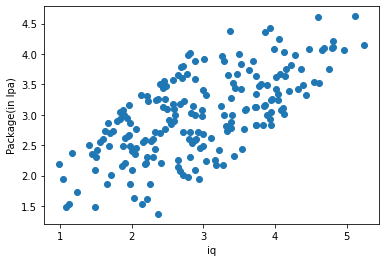

In [190]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [191]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [193]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [194]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8109636126723281


In [195]:
# Adjusted r2
# the accuracy increased with impactful columns
1 - ((1-r2)*(40-1)/(40-1-2))

0.800745429573535